Now, we’ve seen just how powerful Quantum Computing is, with the **Deutsch-Jozsa** Algorithm’s incredible **O(1)** run-time complexity.

However, Deutsch-Jozsa doesn’t really do a lot. In fact, the problem seems awfully specific, as if crafted to play to Quantum Computers’ strengths. 

Not that this makes the algorithm ‘bad’ per se — it still shows the incredible potential of Quantum Computing — but still, let’s look at a more general, albeit complex version. One that solves a much more difficult problem with a still-amazing speedup. One that could even potentially have real-world applications in cryptography. **Bernstein-Vazirani Algorithm**.

# Introduction :

## Bernstein-Vazirani Problem :

Consider the example of Quantum Game show which we have considered for explaining Deutsch-Jozsa Algorithm.

Here also, for Bernstein-Vazirani we are modelling our algorithm as a oracle and rules of the problem can be interpreted as host laying out the rules of Quantum Game.

***In Deutsch-Jozsa :***
```text
Host : "Here is a list of numbers. 
        You can choose any of them and hand it to me. 
        In return i will tell you '0' or '1'."
```

Now the Bernstein-Vazirani is similar to this Deutsch-Jozsa but there is a twist.

***In Bernstein-Vazirani :***
```text
Host : "I am thinking of one, very specific number in a list which is given to you.
        You also need to select a number and give it to me.
        I will tell you inner product of your number and mine with modulo 2.
        It will be '0' or '1'.
        You have to guess exact number I'm thinking of to win. 
        There is only one right answer, out of all possible numbers.
        Which number am I thinking of? Can you guess it?"
```

## Classical Algorithm :

The number which we are guessing from a list of numbers is our Query from a particular input domain.

Here, the host can be considered as a **Black-box Oracle**. Hosts holds a hidden bit string( number we need to guess) and uses it in their operation.

Host takes our input and his hidden value and performs inner product of those two numbers and and also performs modulo 2. This should either give **'0'** or **'1'** as the result of operation.

### What is inner product ?

- Inner products are just like dot products — except they continue the same process for more than just 2 numbers.

- In short, we take a single element from both vectors, and multiply them. Take the next two elements, multiply them, and add the result to the previous number. Take the next two, multiply, and add to the running total, and so on.

Now how inner product is related to our situation!!!. Generally inner product involves two vectors, and here we are discussing about two numbers.

Let's say from Host(oracle's) perspective those two number are binary strings.

- Let the hidden bit string is **'01101'** and our selection (query) is **'10101'**.

- So how do we map these to vectors? Quite simply, all we have to do is take each binary digit as an element, and write the vectors out.

- We can’t take the inner product of two row vectors, though — as explained in the last link, we’ll need take the transpose of the first vector. Just change it from a column to a row vector, and keep everything else the same.

$${\begin{bmatrix}0\\1\\1\\0\\1\end{bmatrix}}^T\cdot\begin{bmatrix}1\\0\\1\\0\\1\end{bmatrix} = \begin{bmatrix}0&1&1&0&1\end{bmatrix}\cdot\begin{bmatrix}1\\0\\1\\0\\1\end{bmatrix}$$

- Then multiply each element, and add to get a result of 2.

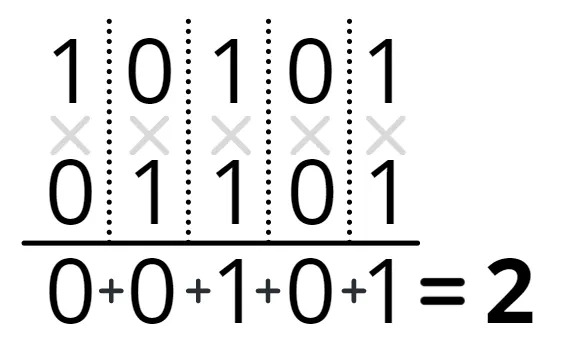

Interestingly, only **(1x1)** will ever return **1** in the multiplication stage; all other combinations return **0**. 

This matches up with the Truth Table for the **Classical AND Gate**, meaning this can be exactly represented by AND Gates. It’s nothing essential to the process, but an intriguing idea nonetheless.

Now perform modulo operation by **2** to the result of Inner product.

### What is Modulo Operation?

Now what’s a modulo operation? It’s remarkably simple — just a remainder.

For example :
$$10-Modulo(5) = \frac{10}{5} \implies\ result\ = 2\ and\ remainder\ = 0\$$

$$Module(5) = 0$$

Dividing 10 by 3, for example, goes 3 times with a remainder of 1. So, 10 mod(3) = 1. Easy as that.

- So we have got value of inner product as 2. and we need to perform modulus with 2.

- This gives $2mod(2) = 0$, so our Oracle would output zero.

If, our input had been something like **‘01000’**, it would have output **‘1’**.

## Classical Solution :

Now let us viualize above algorithm in simple block diagram.

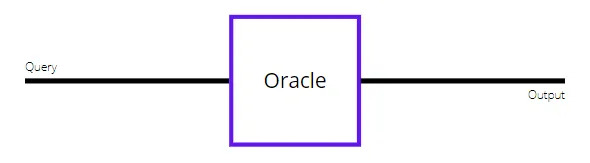

```text
The query is our guess and output is '0' or '1'
```

Now, we only get a single bit of Output to work with. Logically, this means each time we query the Oracle, we can get a single bit of information at most about the hidden bit string.

Because of this, we want to avoid wasting any of those bits, and get rid of any ambiguity. We need an input which can, with 100% certainty, determine one bit of the answer.

Consider the Query **'01000'**. Why does it output **1**?

- Because the **‘1’** in the Query matched up with a **‘1’** in the answer, we got an output of **1 mod(2) = 1**.

- Every other Query bit was **0**, and so would have simply added **0** to the answer — so this could not have been **3 mod(2)**.

- If we had gotten a **0** as output, then we know our **‘1’** didn’t match up with a **‘1’** in the hidden bit string. There must have been a **zero** in that spot.

- So, we know for sure that we have a **‘1’** in the answer, in the second position.

The Classical Algorithm simply repeats this process for every bit! For a string of length 5, like our example, that means **‘10000’, ‘01000’, ‘00100’, ‘00010’,** and **‘00001’**.

At that point, we are guaranteed to know the answer — the number of Queries equals the length of the list. Thinking back to Big-O Notation, that’s **O(n)** time, and won’t scale very well for massive lists.

This means, Let us consider hidden bit string we used before **01101**. We don't know this string as host hides it.

**1st turn :**
$$\begin{aligned} 
User &\implies \mathsf{10000}\\
Host &\implies \mathsf{Inner-Product}(\mathsf{Hiddenstring},\mathsf{10000})\\
Host &\implies \begin{bmatrix}0&1&1&0&1\end{bmatrix}\cdot\begin{bmatrix}1\\0\\0\\0\\0\end{bmatrix}= 0.1+1.0+1.0+0.0+1.0 = 0\\ 
Host &\implies \mathsf{0 \% 2} = 0
\end{aligned}$$

- Thus, with 1st turn User (we) get to know that 1st digit of secret string is **0**.

**2nd turn :**
$$\begin{aligned} 
User &\implies \mathsf{01000}\\
Host &\implies \mathsf{Inner-Product}(\mathsf{Hiddenstring},\mathsf{01000})\\
Host &\implies \begin{bmatrix}0&1&1&0&1\end{bmatrix}\cdot\begin{bmatrix}0\\1\\0\\0\\0\end{bmatrix}= 0.0+1.1+1.0+0.0+1.0 = 1\\ 
Host &\implies \mathsf{1 \% 2} = 1
\end{aligned}$$

-Thus, with 2nd turn we get to know that 2nd digit of secret binary string is **1**.

**3rd turn :**
$$\begin{aligned} 
User &\implies \mathsf{00100}\\
Host &\implies \mathsf{Inner-Product}(\mathsf{Hiddenstring},\mathsf{00100})\\
Host &\implies \begin{bmatrix}0&1&1&0&1\end{bmatrix}\cdot\begin{bmatrix}0\\0\\1\\0\\0\end{bmatrix}= 0.0+1.0+1.1+0.0+1.0 = 1\\ 
Host &\implies \mathsf{1 \% 2} = 1
\end{aligned}$$

-Thus, with 3rd turn we get to know that 3rd digit of secret binary string is **1**.

**4th turn :**
$$\begin{aligned} 
User &\implies \mathsf{00010}\\
Host &\implies \mathsf{Inner-Product}(\mathsf{Hiddenstring},\mathsf{00010})\\
Host &\implies \begin{bmatrix}0&1&1&0&1\end{bmatrix}\cdot\begin{bmatrix}0\\0\\0\\1\\0\end{bmatrix}= 0.0+1.0+1.0+0.1+1.0 = 0\\ 
Host &\implies \mathsf{0 \% 2} = 0
\end{aligned}$$

-Thus, with 4th turn we get to know that 4th digit of secret binary string is **0**.

**5th turn :**
$$\begin{aligned} 
User &\implies \mathsf{00001}\\
Host &\implies \mathsf{Inner-Product}(\mathsf{Hiddenstring},\mathsf{00001})\\
Host &\implies \begin{bmatrix}0&1&1&0&1\end{bmatrix}\cdot\begin{bmatrix}0\\0\\0\\0\\1\end{bmatrix}= 0.0+1.0+1.0+0.0+1.1 = 1\\ 
Host &\implies \mathsf{1 \% 2} = 1
\end{aligned}$$

-Thus, with 5th turn we get to know that 5th digit of secret binary string is **1**.

Now accumulation results of all turns starting from **1st turn as LSB** final string is **01101**.

We have performed atmost 5 operations for 5 bit Binary secret string. Similarly, for **n** bits we need to perform **n** operations. So classical algorithm is of complexity **O(n)**.

## Quantum Algorithm :

Bernstein-Vazirani algorithm is quiet similar to Deutsch-Jozsa algorithm and also has a **O(1)** complexity and quantum properties similar to it.

Now let us try to draw a general Quantum circuit for this Quantum Algorithm by making sure it as to be reversible.

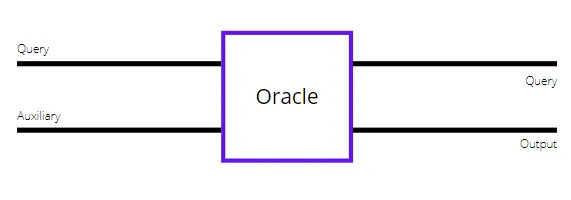

While we’re at it, let’s create the Qiskit environment we’ll be working in. We’ll handle imports and initialise our Circuit.

```python
#the size pf query and Hidden bit-string
n = 5 
#initialize ckt with extra auxillary bit
circuit = q.QuantumCircuit(n+1,n) 
```

Here we considered **n** classical bits and **n+1** qubits. This is because ***we don't need to perform measurement for Auxillary Qubit***.

Similar to Deutsch-Jozsa here also we are using **Superposition** and **Phase kickback**.

Now let us apply **Hadamard Gate** to each Query Qubit to make it a superposition.

```python
for i in range(0,n):
    circuit.h(i) #Hadamard on entire Query
```

**Here is where we are so far :**

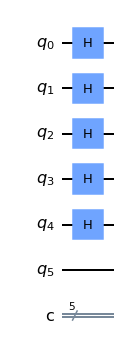

In [3]:
# We want Qiskit, of course — it’s how we’ll construct our Quantum Circuit.
# In order to display our Circuit Diagrams clearly, let’s import Matplotlib, shortened to mpl.
# Finally, to control parts of our Oracle, let’s import choice and randint from the random library.

import qiskit
import matplotlib as mpl
from random import choice, randint

#the size pf query and Hidden bit-string
n = 5 
#initialize ckt with extra auxillary bit
circuit = qiskit.QuantumCircuit(n+1,n)

for i in range(0,n):
    circuit.h(i)
circuit.draw('mpl')

We can’t quite figure out **Phase Kickback** just yet — we need to know what gates the Oracle contains, so that we can find the right *eigenvector* to use. So let’s get on that.

**What does Oracle do?**

The Oracle needs to do 4 things:

1. Contain a random, n-bit hidden bit string. In our case, n=5.

2. Take in two inputs, the Query and Auxiliary.

3. Calculate the inner product of the hidden bit-string and Query mod(2) without affecting the Query, and set the Auxiliary to that value.

4. Output the Query and Auxiliary output.

Let’s handle the first two stages quickly, defining our Oracle function. It’ll take in the Query and Auxiliary through the ‘circuit’ argument, and the value of n through ‘n’.

We are using random binary string generator of n digits, so that we have no idea which one oracle uses. For better interpretation we are including barriers also.

```python
def Oracle(circuit,n):
    #random integer
    hidden_bits = randint(0,2**n-1) 
    #converting random integer to Binary string
    hidden_bits = format(hidden_bits,'0'+str(n)+'b') 
    circuit.barrier()
```

Now, let’s break down Stage 3 into what needs to happen at each step. Let’s look at the Truth Table for each individual multiplication between the first bits, using our examples of hidden bit string **‘01101’** and Query **‘10101’**.

|A|B|A.B|
|-|-|---|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

We take the **‘0’** and the **‘1’**, and multiply them together. Since there’a a zero present, we don’t add anything to our final result.

For the **‘1’** and **‘0’** afterwards, we have the same result.
After that, we get two **1’s**. This means we add 1 to the result, **changing our ‘0’ Auxiliary to a ‘1’**.

**Two zeros follow, and we do nothing to the Auxiliary**.

Another two ones, so we add 1 again, rising to 2. Keeping in mind our **mod(2)**, though, this actually changes the ‘1’ back to a ‘0’.

So we’re flipping our Auxiliary between **‘0’ and ‘1’** which is similar to **X-Gate** & considering that with the fact that the **‘flipping’** depends upon our Query, which relates to 2-Qubit Gate, the **Controlled-X**. It fulfils all of our requirements, just like in Deutsch-Jozsa!

The CX Gate clearly links the Query with the output — ***if the Query bit is equal to 1, add to the Auxiliary by flipping it***. 

**How to represent the hidden bit string?**

Here we need to make sure that the Auxillary remains unaffected even if Query is **1** & Hidden bit in string **0**.

So what controls Auxillary is the combination of Query (in **0** or **1** state) and **presence of CX Gate**.

***This means we are creating influence of Query and Hidden Bit string over Auxillary and CX gate***.

Just like we can turn the Query **‘on’ and ‘off’** with the binary value, we need to turn the **CX Gate ‘on’ and ‘off’**.

***We can look at each bit of the hidden bit string. If that bit is a ‘0’, then no need to add a CX Gate; just pass over that bit. If it’s a ‘1’, then we’ll use the CX Gate on the corresponding bit of the Query and Auxiliary.***

```python
for i in range(n):
    if hidden_bits[i] == '0':
        pass
    elif hidden_bits[i] == '1':
        circuit.cx(i,n+1)    #if hidden bit is 1, CX on 
                             #corresponding Query and Auxiliary
```

Now all we need to do is close off the Oracle with a barrier, and return the circuit. We’ll also return the hidden bit string, so we can check if the algorithm works later on.

```python
circuit.barrier()
return circuit,hidden_bits
```

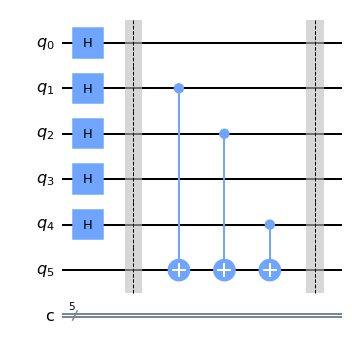

In [15]:
#the size pf query and Hidden bit-string
n = 5 
#initialize ckt with extra auxillary bit
circuit = qiskit.QuantumCircuit(n+1,n)

def Oracle(circuit,n):
    #random integer
    # hidden_bits = randint(0,2**n-1) 
    # #converting random integer to Binary string
    # hidden_bits = format(hidden_bits,'0'+str(n)+'b') 
    hidden_bits = "01101"
    circuit.barrier()

    for i in range(n):
        if hidden_bits[i] == '0':
            pass
        elif hidden_bits[i] == '1':
            circuit.cx(i,n)    #if hidden bit is 1, CX on 
                                 #corresponding Query and Auxiliary

    circuit.barrier()
    return circuit,hidden_bits


for i in range(0,n):
    circuit.h(i)

circuit,hidden_bit=Oracle(circuit,n)
circuit.draw('mpl')

We’re not quite done with this section yet, though. We’ve still got to handle Phase Kickback.

Now that we know our Oracle uses CX Gates, we know which eigenvector we’ll need to use to get our eigenvalue of -1, and ‘smuggle’ out information.

We’ll need to initialise our Auxiliary in the **‘ — ‘** state. This causes **Phase Kickback** to kick the eigenvalue **‘-1’** onto the Control qubit, the Query, and leaving a mark. 

The **‘mark’** is **Relative Phase**, *which leaves the measurement probabilities of the circuit unchanged, and the circuit fully reversible — but sets qubits that went through a CX Gate as different to those that didn’t*.

Setting this **‘ — ‘** state up is simple enough — before we add our Oracle to the Circuit, we’ll set up our Auxiliary with an **X and Hadamard Gate**, which puts us perfectly into the right state.

```python
circuit.x(n+1)
circuit.h(n+1)  #initialise Auxiliary into |-> for Phase Kickback
circuit,hidden_bits = Oracle(circuit,n)
```

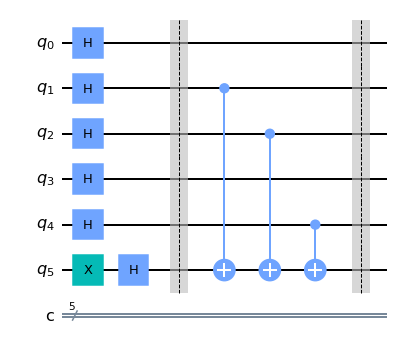

In [17]:
#the size pf query and Hidden bit-string
n = 5 
#initialize ckt with extra auxillary bit
circuit = qiskit.QuantumCircuit(n+1,n)

def Oracle(circuit,n):
    #random integer
    # hidden_bits = randint(0,2**n-1) 
    # #converting random integer to Binary string
    # hidden_bits = format(hidden_bits,'0'+str(n)+'b') 
    hidden_bits = "01101"
    circuit.barrier()

    for i in range(n):
        if hidden_bits[i] == '0':
            pass
        elif hidden_bits[i] == '1':
            circuit.cx(i,n)    #if hidden bit is 1, CX on 
                                 #corresponding Query and Auxiliary

    circuit.barrier()
    return circuit,hidden_bits


for i in range(0,n):
    circuit.h(i)

circuit.x(n)
circuit.h(n)  #initialise Auxiliary into |-> for Phase Kickback

circuit,hidden_bit=Oracle(circuit,n)
circuit.draw('mpl')

Now, let’s look at the **Output** our Oracle gives us.

Obviously, there’s our Auxiliary, holding information about that **inner-product & mod(2)** operations. 

It’s got a single bit of information, but we want to reconstruct the entire hidden bit thing. The Auxiliary does very little to help us in that regard.

Instead, our Query holds the golden ticket. Phase Kickback only affected the **‘1’** component of the Query, and therefore the superpositions underwent a shift in Relative Phase. 

Any Query which passed through a CX Gate had its state flipped like so:
$$CX|+\rangle = CX(\frac{|0\rangle+|1\rangle}{\sqrt{2}}) = \frac{|0\rangle+CX|1\rangle}{\sqrt{2}} = \frac{|0\rangle-|1\rangle}{\sqrt{2}} = |-\rangle$$

Here, the CX Gate ‘kicked back’ that **-1** eigenstate, but only onto the **‘1’** state which activated it. This flipped the state from **‘+’ to ‘ — ‘**.

Just like Deutsch-Jozsa, we’ve smuggled out our information. Any qubit that interacted with a CX Gate has the **‘ — ‘** state, whereas any qubit that did not would still be in the **‘+’** state.

So, again like Deutsch-Jozsa, we apply a **Hadamard** to all of these qubits. 

- Any qubit in the ‘ — ‘ state transforms into the ‘1’ state, and those in ‘+’ transform to the ‘0’ state .

- If we measure all of the Query, we’ll know exactly which qubit did which option.

Qubits in the **‘1’** state must have gone through the **CX Gates**, and so represent the positions of the **‘1’s in the hidden bit string!**

```python
for i in range(n):
    circuit.h(i)   #take all qubits out of superposition 
    circuit.measure(i,i)   # and measure
```

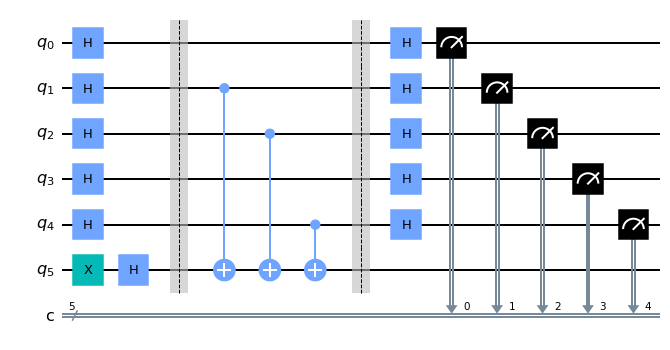

In [18]:
for i in range(n):
    circuit.h(i)   #take all qubits out of superposition 
    circuit.measure(i,i)   # and measure

circuit.draw("mpl")

The last thing we have do to with our Quantum Circuit is set up our simulation of it.

```python
simulator = qiskit.BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(circuit, simulator, shots=1, memory=True)
result = job.result()
measurements = result.get_memory()[0]   #e.g '10110'
```

In [21]:
simulator = qiskit.BasicAer.get_backend('dm_simulator')
job = qiskit.execute(circuit, simulator, shots=1)
result = job.result()
measurements = result.results[0]   #e.g '10110'

In [22]:
print(measurements)

ExperimentResult(shots=0, success=True, meas_level=2, data=ExperimentResultData(partial_probability={'00000': 0.0, '00001': 0.0, '00010': 0.0, '00011': 0.0, '00100': 0.0, '00101': 0.0, '00110': 0.0, '00111': 0.0, '01000': 0.0, '01001': 0.0, '01010': 0.0, '01011': 0.0, '01100': 0.0, '01101': 1.0, '01110': 0.0, '01111': 0.0, '10000': 0.0, '10001': 0.0, '10010': 0.0, '10011': 0.0, '10100': 0.0, '10101': 0.0, '10110': 0.0, '10111': 0.0, '11000': 0.0, '11001': 0.0, '11010': 0.0, '11011': 0.0, '11100': 0.0, '11101': 0.0, '11110': 0.0, '11111': 0.0}, coeffmatrix=[ 0.01563 -0.01563  0.      ...  0.01563  0.       0.     ], densitymatrix=[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1],

So in the above output for **'01101':1.0** we have got the probability as **1** which is our example input.